# Bike Sharing Demand

In [1]:
import pandas as pd

## Load Dataset

In [4]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)

train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)

test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime

In [9]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)

train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 20)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [10]:
train.loc[train["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
train.loc[train["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
train.loc[train["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
train.loc[train["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
train.loc[train["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
train.loc[train["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
train.loc[train["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

print(train.shape)

train[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(10886, 20)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-01 00:00:00,5,Saturday
1,2011-01-01 01:00:00,5,Saturday
2,2011-01-01 02:00:00,5,Saturday
3,2011-01-01 03:00:00,5,Saturday
4,2011-01-01 04:00:00,5,Saturday


In [11]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)

test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [12]:
test.loc[test["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
test.loc[test["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
test.loc[test["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
test.loc[test["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
test.loc[test["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
test.loc[test["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
test.loc[test["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

print(test.shape)

test[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-20 00:00:00,3,Thursday
1,2011-01-20 01:00:00,3,Thursday
2,2011-01-20 02:00:00,3,Thursday
3,2011-01-20 03:00:00,3,Thursday
4,2011-01-20 04:00:00,3,Thursday


## Explore

In [13]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

### datetime

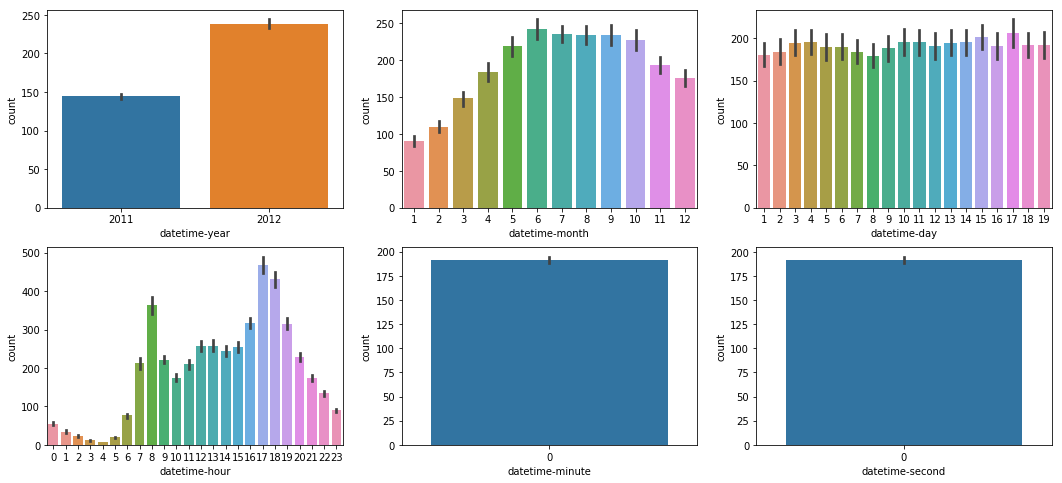

In [14]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

### datetime-year & datetime-month

In [15]:
train["datetime-year(str)"] = train["datetime-year"].astype('str')
train["datetime-month(str)"] = train["datetime-month"].astype('str')

train["datetime-year_month"] = train["datetime-year(str)"] + "-" + train["datetime-month(str)"]

print(train.shape)

train[["datetime", "datetime-year_month"]].head()

(10886, 23)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


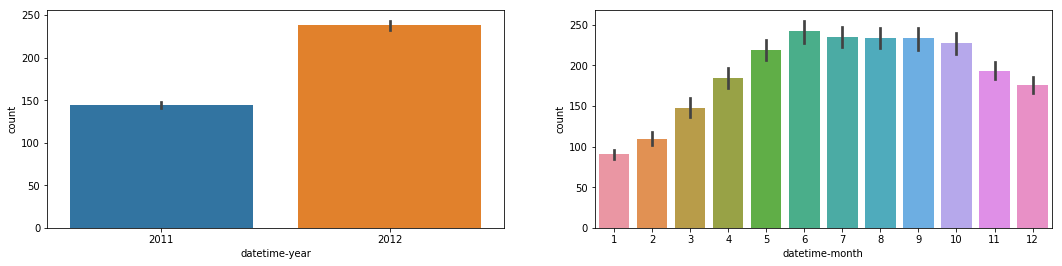

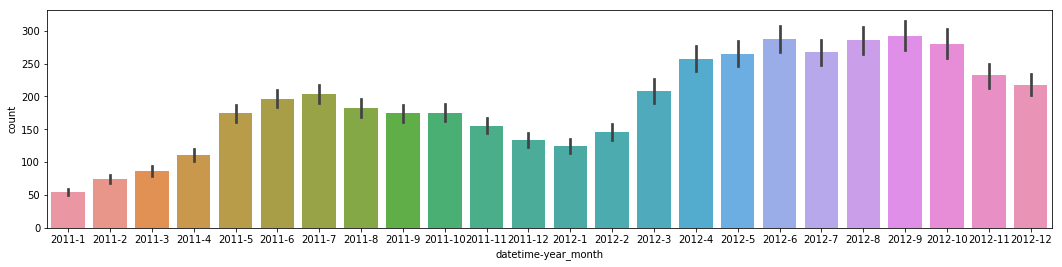

In [16]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

### datetime-hour

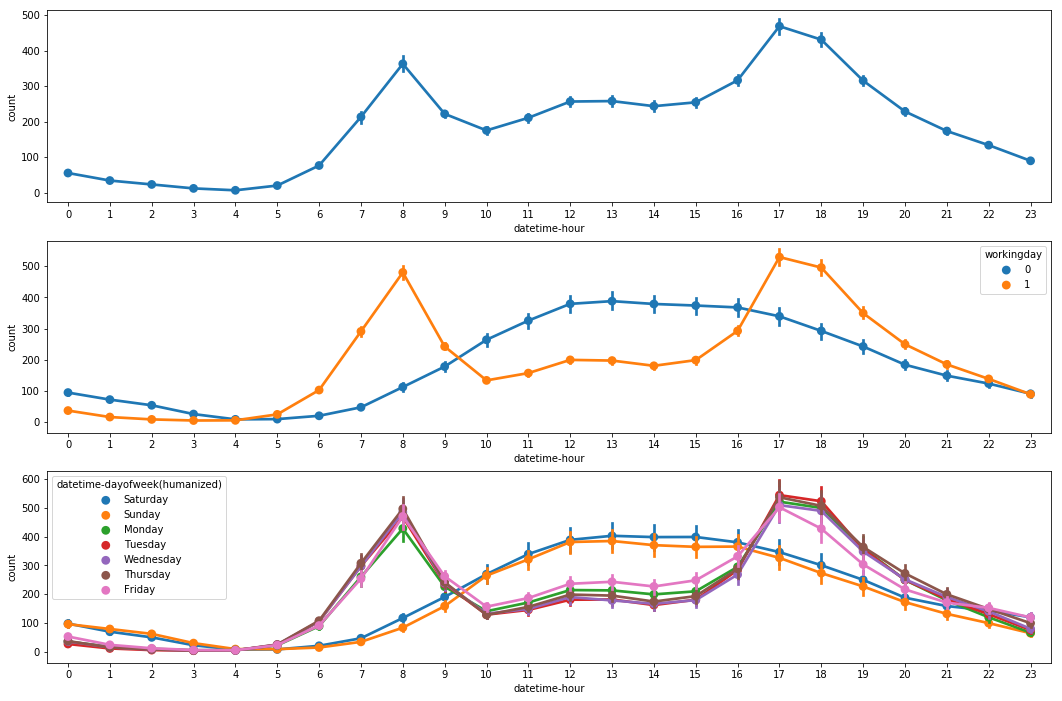

In [17]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

figure.set_size_inches(18, 12)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek(humanized)", ax=ax3)

### count

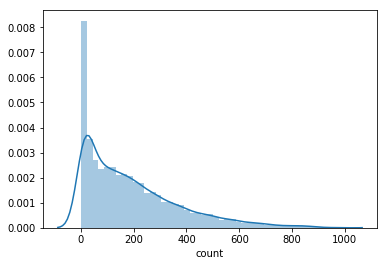

In [18]:
sns.distplot(train["count"])

In [20]:
import numpy as np
train["log_count"] = np.log(train["count"] + 1)

print(train.shape)

train[["count", "log_count"]].head()

(10886, 24)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


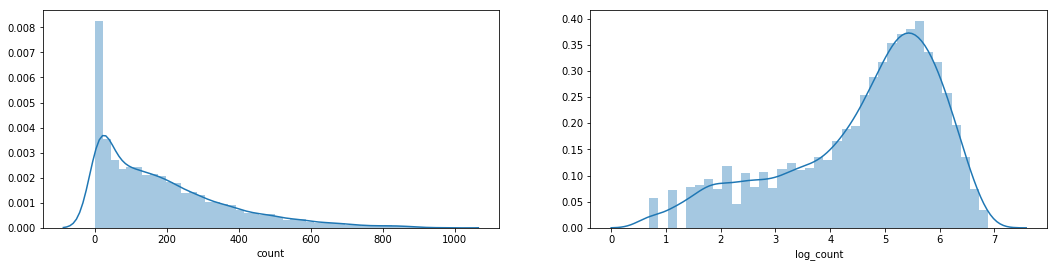

In [21]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18, 4)

sns.distplot(train["count"], ax=ax1)
sns.distplot(train["log_count"], ax=ax2)

In [22]:
train["count(recover)"] = np.exp(train["log_count"]) - 1

print(train.shape)

train[["count", "log_count", "count(recover)"]].head()

(10886, 25)


,count,log_count,count(recover)
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


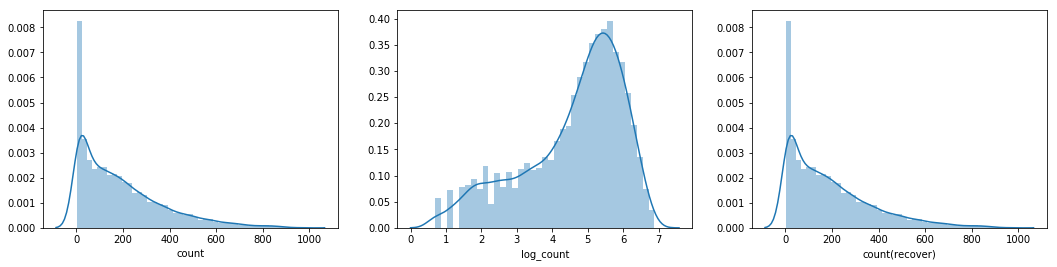

In [23]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

figure.set_size_inches(18, 4)

sns.distplot(train["count"], ax=ax1)
sns.distplot(train["log_count"], ax=ax2)
sns.distplot(train["count(recover)"], ax=ax3)

## Train

In [24]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [25]:
label_name = "log_count"
label_name

'log_count'

In [26]:
X_train = train[feature_names]

print(X_train.shape)

X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [27]:
X_test = test[feature_names]

print(X_test.shape)

X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [28]:
y_train = train[label_name]

print(y_train.shape)

y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

### Evaluate

In [29]:
import numpy as np
from sklearn.metrics import make_scorer

def rmse(predict, actual):

    predict = np.array(predict)

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()
   
    score = np.sqrt(mean_square_distance)
 
    return score

rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

## LightGBM

In [41]:
from lightgbm import LGBMRegressor

model = LGBMRegressor()
%time model.fit(X_train, y_train)

Wall time: 186 ms


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Hyperparameter Tuning

In [30]:
from datetime import datetime

today = str(datetime.now())
today

'2019-07-23 23:47:15.264395'

In [31]:
from sklearn.model_selection import train_test_split

random_state = 42

X_train_hold, X_valid_hold, y_train_hold, y_valid_hold = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

In [32]:
print(X_train_hold.shape)
X_train_hold.head()

(8708, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
2815,3,0,1,1,27.88,31.820,83,6.0032,2011,5,2
8695,3,0,0,1,36.90,40.910,39,19.9995,2012,16,5
8406,3,0,1,1,32.80,35.605,41,16.9979,2012,15,2
1543,2,0,0,2,14.76,18.180,93,7.0015,2011,4,6
4952,4,0,0,1,13.12,15.150,45,16.9979,2011,10,5


In [33]:
print(X_valid_hold.shape)
X_valid_hold.head()

(2178, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
3133,3,0,1,1,33.62,40.150,59,0.0000,2011,11,1
5786,1,1,0,1,4.10,6.820,54,6.0032,2012,6,0
5224,4,0,0,1,9.84,11.365,48,12.9980,2011,18,6
8953,3,0,1,2,29.52,34.090,62,12.9980,2012,10,2
8054,2,0,1,1,25.42,31.060,53,16.9979,2012,23,4


In [34]:
print(y_train_hold.shape)
y_train_hold.head()

(8708,)


2815    3.583519
8695    6.111467
8406    5.624018
1543    1.791759
4952    5.303305
Name: log_count, dtype: float64

In [35]:
from datetime import datetime

today = str(datetime.now())
filename = f"bike_demand_coarse-search {today}.csv"

filename

'bike_demand_coarse-search 2019-07-23 23:49:05.515671.csv'

### Coarse Search

In [42]:
model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [46]:
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.model_selection import cross_val_score

random_state = 42

today = str(datetime.now())
filename = f"bike_demand_coarse-search {today}.csv"
filename = "".join(i for i in filename if i not in "\/:*?<>|") #네이버팁

num_loop = 100
n_estimators = 1000
# num_loop = 5
# n_estimators = 10
early_stopping_rounds = 20 
#early_stoppring_rounds -> train 셋과 함께 test 셋도 홀드아웃베리데이션 한다, 
#20번까지는 로그로스가 높아져도 진행한다는 의미

X_train_hold, X_valid_hold, y_train_hold, y_valid_hold = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

coarse_hyperparameters_list = []

for loop in range(num_loop):
    num_leaves =  np.random.randint(10, 200)
    min_child_samples = np.random.randint(2, 200)
    min_child_weight = np.random.uniform(0.1, 1.0)
    subsample = np.random.uniform(0.1, 1.0) 
    colsample_bytree = np.random.uniform(0.1, 1.0)
    learning_rate = 10 ** -np.random.uniform(low=1, high=10)
    reg_alpha = 10 ** -np.random.uniform(low=1, high=10)
    reg_lambda = 10 ** -np.random.uniform(low=1, high=15)
    drop_rate = np.random.uniform(0.1, 1.0)
    
    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()

    parameters ={'loop': loop,
                 'score': score,
                 'num_leaves': num_leaves, 
                 'min_child_samples': min_child_samples, 
                 'min_child_weight': min_child_weight,
                 'subsample': subsample, 
                 'colsample_bytree': colsample_bytree,
                 'reg_alpha': reg_alpha,
                 'reg_lambda': reg_lambda,
                 'n_estimators': n_estimators,
                 'learning_rate' : learning_rate,
                 'random_state': random_state}
    
    model = LGBMRegressor(**parameters)
    #https://mingrammer.com/understanding-the-asterisk-of-python/
    
    model.fit(X_train_hold, y_train_hold,
              eval_set=[(X_valid_hold, y_valid_hold)],
              verbose=0,
              early_stopping_rounds=early_stopping_rounds)
    
    parameters['n_estimators'] = model.best_iteration_
    
    print(f"{loop:2} best iteration = {parameters['n_estimators']}, Score = {parameters['score']:.6f}")
    
    coarse_hyperparameters_list.append(parameters)
    coarse_hyperparameters_data = pd.DataFrame(coarse_hyperparameters_list)
    coarse_hyperparameters_data = coarse_hyperparameters_data.sort_values(by="score")
    
    coarse_hyperparameters_data.to_csv(filename)
    
coarse_hyperparameters_data.head(10)

 0 best iteration = 1000, Score = 1.422474
 1 best iteration = 1000, Score = 1.422927
 2 best iteration = 1000, Score = 0.678382
 3 best iteration = 1000, Score = 1.423044
 4 best iteration = 1000, Score = 1.260015
 5 best iteration = 1000, Score = 1.423052
 6 best iteration = 314, Score = 1.358221
 7 best iteration = 1000, Score = 0.332959
 8 best iteration = 1000, Score = 0.355339
 9 best iteration = 1000, Score = 1.422995
10 best iteration = 1000, Score = 1.415446
11 best iteration = 1000, Score = 0.577606
12 best iteration = 1000, Score = 0.596421
13 best iteration = 1000, Score = 1.423048
14 best iteration = 1000, Score = 1.422954
15 best iteration = 1000, Score = 1.356721
16 best iteration = 1000, Score = 1.423052
17 best iteration = 1000, Score = 1.423037
18 best iteration = 1000, Score = 1.354535
19 best iteration = 1000, Score = 1.422973
20 best iteration = 1000, Score = 1.230709
21 best iteration = 1000, Score = 1.423025
22 best iteration = 1000, Score = 1.423048
23 best iter

,colsample_bytree,learning_rate,loop,min_child_samples,min_child_weight,n_estimators,num_leaves,random_state,reg_alpha,reg_lambda,score,subsample
80,0.477315,8.360145e-02,80,15,0.486068,398,54,42,2.615969e-03,6.347406e-13,0.317959,0.702947
72,0.171912,4.340748e-10,72,58,0.124384,1000,17,42,1.447255e-09,2.457578e-12,0.319916,0.457855
89,0.409614,1.882760e-05,89,142,0.940517,1000,185,42,1.946933e-03,4.517445e-14,0.320974,0.835532
92,0.379889,2.240247e-08,92,158,0.177523,1000,156,42,9.990259e-02,4.786246e-08,0.326433,0.507448
41,0.212780,4.347798e-07,41,8,0.284182,1000,159,42,2.204127e-05,1.261788e-11,0.327578,0.263475
78,0.226804,8.350170e-05,78,121,0.810717,1000,32,42,3.736540e-05,8.470263e-13,0.327748,0.975071
28,0.337710,8.935477e-04,28,184,0.554201,1000,182,42,1.405584e-02,4.724010e-14,0.331552,0.161834
7,0.877340,4.008841e-03,7,129,0.546691,1000,95,42,3.683472e-09,1.960525e-05,0.332959,0.606010
51,0.346553,2.716064e-08,51,72,0.499694,1000,164,42,2.083958e-02,8.708759e-03,0.333073,0.157165
81,0.896029,3.439370e-06,81,183,0.426475,1000,85,42,1.569165e-02,1.389497e-08,0.334398,0.630312


### Fine Search

In [53]:
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score
from datetime import datetime

random_state = 42

today = str(datetime.now())
filename = f"bike_demand_finer-search {today}.csv"
filename = "".join(i for i in filename if i not in "\/:*?<>|")

#num_loop = 100
num_loop = 20

#kf = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=False)
#kf를 multi class에서 쓸수 없다..ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

finer_hyperparameters_list = []

for loop in range(num_loop):
    n_estimators = np.random.randint(300, 3000)
    num_leaves =  np.random.randint(10, 190)
    min_child_samples = np.random.randint(10, 150)
    min_child_weight = np.random.uniform(0.1, 0.9) 
    subsample = np.random.uniform(0.4, 0.8) 
    colsample_bytree = np.random.uniform(0.4, 0.7)
    reg_alpha = 10 ** -np.random.uniform(low=3, high=8)
    reg_lambda = 10 ** -np.random.uniform(low=5, high=15)
    learning_rate = 10 ** -np.random.uniform(low=0.9, high=3)

    parameters ={'loop': loop,
                 'n_estimators': n_estimators,
                 'num_leaves': num_leaves, 
                 'min_child_samples': min_child_samples, 
                 'min_child_weight': min_child_weight,
                 'subsample': subsample, 
                 'colsample_bytree': colsample_bytree,
                 'reg_alpha': reg_alpha,
                 'reg_lambda': reg_lambda,
                 'n_estimators': n_estimators,
                 'learning_rate' : learning_rate,
                 'random_state': random_state}

    fit_params = {'verbose':0}
    
    model = LGBMRegressor(**parameters)
    
    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean() 
    
    parameters['score'] = score
    
    print(f"{loop:2} best iteration = {parameters['n_estimators']}, Score = {parameters['score']:.6f}")
    
    finer_hyperparameters_list.append(parameters)
    finer_hyperparameters_data = pd.DataFrame(finer_hyperparameters_list)
    finer_hyperparameters_data = finer_hyperparameters_data.sort_values(by="score")
    
    finer_hyperparameters_data.to_csv(filename)
    
finer_hyperparameters_data.head(10)

 0 best iteration = 2863, Score = 0.320671
 1 best iteration = 2031, Score = 0.347202
 2 best iteration = 760, Score = 0.323302
 3 best iteration = 631, Score = 0.734284
 4 best iteration = 369, Score = 0.743344
 5 best iteration = 871, Score = 0.546120
 6 best iteration = 2692, Score = 0.329093
 7 best iteration = 1640, Score = 0.337445
 8 best iteration = 1651, Score = 0.556881
 9 best iteration = 1331, Score = 0.330247
10 best iteration = 1287, Score = 0.673441
11 best iteration = 691, Score = 0.915976
12 best iteration = 1658, Score = 0.338490
13 best iteration = 2828, Score = 0.432704
14 best iteration = 806, Score = 0.317226
15 best iteration = 2038, Score = 0.337841
16 best iteration = 1485, Score = 0.595084
17 best iteration = 2246, Score = 0.336840
18 best iteration = 943, Score = 0.337263
19 best iteration = 1910, Score = 0.339775


,colsample_bytree,learning_rate,loop,min_child_samples,min_child_weight,n_estimators,num_leaves,random_state,reg_alpha,reg_lambda,score,subsample
14,0.696747,0.051462,14,82,0.540812,806,10,42,1.977369e-04,3.132686e-06,0.317226,0.557518
0,0.602744,0.006756,0,140,0.699223,2863,113,42,6.581815e-07,1.130986e-11,0.320671,0.411516
2,0.661201,0.038820,2,135,0.329807,760,170,42,1.390508e-05,1.452967e-11,0.323302,0.412395
6,0.468366,0.021507,6,77,0.487751,2692,119,42,2.355477e-05,1.599910e-07,0.329093,0.560721
9,0.445683,0.075798,9,43,0.469027,1331,42,42,4.062322e-08,4.000402e-11,0.330247,0.448527
17,0.548582,0.002999,17,51,0.663381,2246,44,42,1.287169e-08,4.007169e-12,0.336840,0.613219
18,0.648863,0.032860,18,22,0.832219,943,185,42,3.986197e-06,2.845337e-08,0.337263,0.737240
7,0.697384,0.109859,7,144,0.654027,1640,115,42,2.572778e-04,3.940950e-14,0.337445,0.600240
15,0.581023,0.037806,15,54,0.266835,2038,123,42,2.052631e-06,2.077321e-12,0.337841,0.562168
12,0.471435,0.045877,12,14,0.105270,1658,91,42,7.455257e-05,3.740140e-09,0.338490,0.651488


In [52]:
finer_hyperparameters_data_1 = finer_hyperparameters_data.copy()

finer_hyperparameters_data_1.head()

,colsample_bytree,learning_rate,loop,min_child_samples,min_child_weight,n_estimators,num_leaves,random_state,reg_alpha,reg_lambda,score,subsample
2,0.642093,0.007022,2,138,0.290368,1798,117,42,3.188863e-05,9.530112e-14,0.322785,0.554942
0,0.672226,0.051810,0,16,0.446014,2693,55,42,3.268007e-08,4.585609e-12,0.336823,0.715759
1,0.675664,0.002336,1,103,0.456928,2391,177,42,1.514197e-08,9.185135e-07,0.338884,0.787813
3,0.578751,0.039907,3,11,0.139594,1745,161,42,1.323736e-06,3.562342e-14,0.344942,0.632981
4,0.532239,0.032843,4,35,0.234257,2577,147,42,3.895433e-05,1.858412e-09,0.346465,0.695953


### Evaluate

In [54]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(learning_rate=0.007022,
                       n_estimators=1798,
                       num_leaves=117,
                       min_child_samples=138,
                       min_child_weight=0.290368,
                       subsample=0.554942,
                       colsample_bytree=0.642093,
                       reg_alpha=3.188863e-05,
                       reg_lambda=9.530112e-14,
                       random_state=42)
model

LGBMRegressor(boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.642093, importance_type='split',
       learning_rate=0.007022, max_depth=-1, min_child_samples=138,
       min_child_weight=0.290368, min_split_gain=0.0, n_estimators=1798,
       n_jobs=-1, num_leaves=117, objective=None, random_state=42,
       reg_alpha=3.188863e-05, reg_lambda=9.530112e-14, silent=True,
       subsample=0.554942, subsample_for_bin=200000, subsample_freq=0)

In [55]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()

print(f"Score = {score:.5f}")

Score = 0.32294


### Predict

In [56]:
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.642093, importance_type='split',
       learning_rate=0.007022, max_depth=-1, min_child_samples=138,
       min_child_weight=0.290368, min_split_gain=0.0, n_estimators=1798,
       n_jobs=-1, num_leaves=117, objective=None, random_state=42,
       reg_alpha=3.188863e-05, reg_lambda=9.530112e-14, silent=True,
       subsample=0.554942, subsample_for_bin=200000, subsample_freq=0)

In [57]:
log_predictions = model.predict(X_test)

print(log_predictions.shape)

log_predictions

(6493,)


array([2.63486951, 1.90355754, 1.32610997, ..., 4.70927024, 4.40308648,
       3.81480927])

In [58]:
predictions = np.exp(log_predictions) - 1

print(predictions.shape)

predictions

(6493,)


array([ 12.94149315,   5.70972211,   2.7663636 , ..., 109.97114839,
        80.70265389,  44.36810232])

### Submit

In [59]:
submission = pd.read_csv("data/sampleSubmission.csv")

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [61]:
submission["count"] = predictions

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.941493
1,2011-01-20 01:00:00,5.709722
2,2011-01-20 02:00:00,2.766364
3,2011-01-20 03:00:00,2.052514
4,2011-01-20 04:00:00,1.855035


In [62]:
submission.to_csv("data/bike_demand_ligthgbm_0724.csv", index=False)